In [1]:
# !pip install librosa

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display
import IPython.display as ipd
import librosa
import librosa.display
import soundfile as sf
import sklearn

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
heartack_data = 'osfstorage/olfact.mp3'
olfact_data = 'osfstorage/olfact.wav'
intest_data = 'osfstorage/intest.wav'
cbc_data = 'osfstorage/cbc.wav'
statocysts_data = 'osfstorage/statocysts.wav'

In [4]:
y, sr = librosa.load(heartack_data)

In [5]:
print(type(y), type(sr))
#<class 'numpy.ndarray'> <class 'int'>
print(y.shape, sr)
#(94316,) 22050

<class 'numpy.ndarray'> <class 'int'>
(3856400,) 22050


In [6]:
y = y[:200000]

In [7]:
sf.write('osfstorage/olfact_.wav', y[2166:], sr, 'PCM_24')

In [8]:
print(y[:100])

[-0.00465102 -0.00408043 -0.0023643  -0.00092281  0.00013648  0.0020849
  0.00584811  0.01075049  0.01526111  0.0186765   0.02162207  0.02493187
  0.02851341  0.03162697  0.03406541  0.03661551  0.0401876   0.0446604
  0.04875731  0.051023    0.05084746  0.04866408  0.04542241  0.0419775
  0.03877952  0.03581719  0.03272282  0.0290744   0.02480479  0.02037147
  0.01644605  0.0133862   0.01103303  0.00900977  0.00712306  0.00544294
  0.00414621  0.00346187  0.00369055  0.00494494  0.00666197  0.00756277
  0.00647045  0.00328863 -0.0010192  -0.00552212 -0.01015822 -0.0152229
 -0.02019141 -0.02357305 -0.02426991 -0.02293694 -0.02169484 -0.02245488
 -0.02563094 -0.03032568 -0.03531221 -0.03960066 -0.04241812 -0.04326914
 -0.04227367 -0.04020699 -0.03794196 -0.03589679 -0.03416118 -0.03302229
 -0.03303202 -0.03442094 -0.03662967 -0.03862409 -0.0396549  -0.03960341
 -0.03865308 -0.03685883 -0.03419938 -0.0310012  -0.028136   -0.02660527
 -0.02673477 -0.02764429 -0.02757419 -0.02500351 -0.019

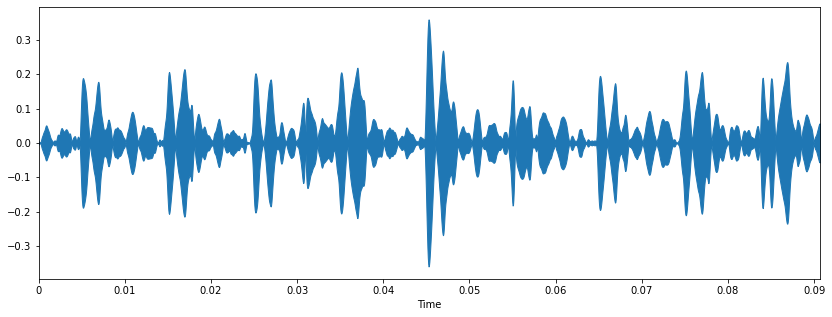

In [9]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y[:2000], sr=sr)

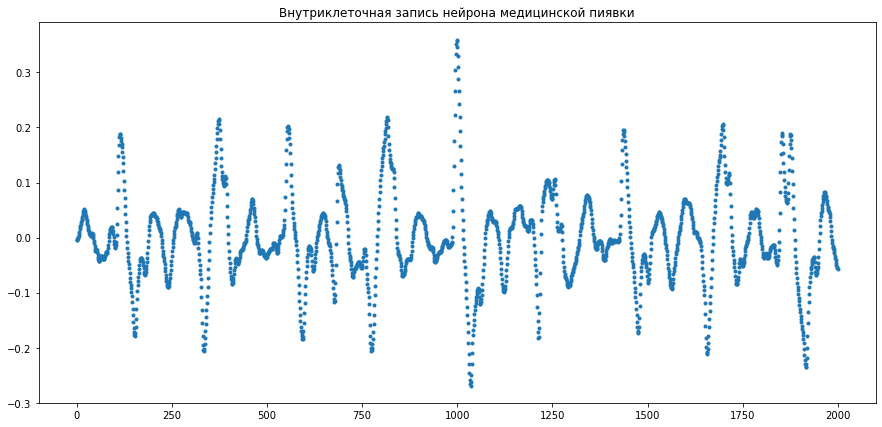

In [10]:
pd.Series(y[:2000]).plot(style='.', figsize=( 15, 7 ), title='Внутриклеточная запись нейрона медицинской пиявки')

In [11]:
pd.Series(y[:2000]).describe()

count    2000.000000
mean       -0.000714
std         0.083042
min        -0.268849
25%        -0.043772
50%        -0.006328
75%         0.041616
max         0.359717
dtype: float64

In [12]:
DF_data = sm.tsa.stattools.adfuller(y,regression='ctt')
DF_data

(-66.00529466549492,
 0.0,
 30,
 199969,
 {'1%': -4.371187950878042,
  '5%': -3.832419533389989,
  '10%': -3.5532783009690037},
 -3028250.8824049)

Ряд стационарен.

In [13]:
x = np.array(range(len(y)))

In [14]:
len(x)

200000

In [15]:
len(y)

200000

-0.0001446953 -4.166970062079836e-10


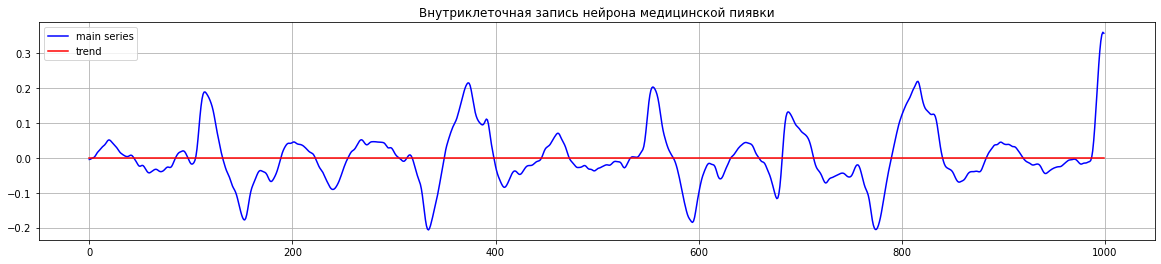

In [16]:
model = LinearRegression()
model.fit(x.reshape(-1, 1),y.reshape(-1, 1))

W1 =model.coef_[0,0]
W0 =y.mean()
print(W0,W1)

plt.figure(figsize =(20,4))
plt.plot( x[:1000], y[:1000], 'b' , label ='main series')
plt.plot( x[:1000], W0+W1*x[:1000], 'r',label='trend' )
plt.title('Внутриклеточная запись нейрона медицинской пиявки' )
plt.legend()
plt.grid()
plt.show()

Проверим с помощью теста Фишера гипотезу о равенстве коэффициентов 0. Для этого воспользуемся пакетом statsmodels (там есть очень удобный метод summary)

In [17]:
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01136
Date:                Fri, 20 Nov 2020   Prob (F-statistic):              0.915
Time:                        14:16:17   Log-Likelihood:             1.7482e+05
No. Observations:              200000   AIC:                        -3.496e+05
Df Residuals:                  199998   BIC:                        -3.496e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.228      0.8

Убираем тренд и переходим к поиску циклов.

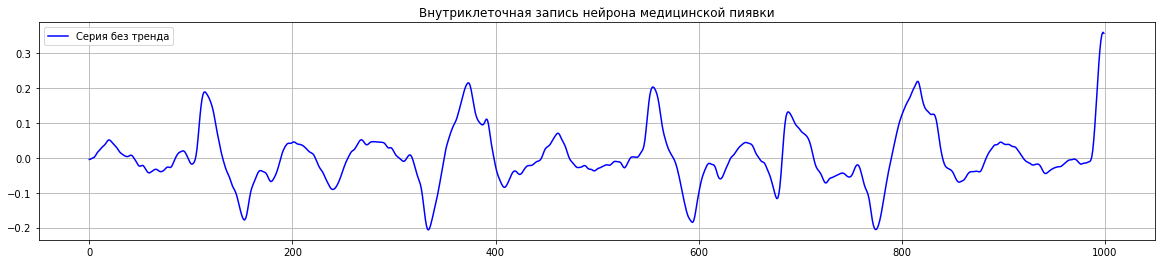

In [18]:
y_no_trend = y - W0-W1*x

plt.figure(figsize =(20,4))
plt.plot(x[:1000],y_no_trend[:1000], 'b' , label ='Серия без тренда')
plt.title('Внутриклеточная запись нейрона медицинской пиявки' )
plt.legend()
plt.grid()
plt.show()

In [19]:
X2 = sm.add_constant(x)
est = sm.OLS(y_no_trend, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 2.231e-11
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               1.00
Time:                        14:16:18   Log-Likelihood:             1.7482e+05
No. Observations:              200000   AIC:                        -3.496e+05
Df Residuals:                  199998   BIC:                        -3.496e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.167e-05      0.000      0.092      0.9

Посчитаем периодичности точно.

In [20]:
season = 2167
# без тренда
y_no_trend_no_season = pd.DataFrame(data=y_no_trend, columns =['no_trend'])
# тренд
y_no_trend_no_season['trend'] = W0-W1*x
# периодические аддитивные сдвиги
y_no_trend_no_season['no_season'] = y_no_trend_no_season['no_trend'] - y_no_trend_no_season['no_trend'].rolling(season).mean()

In [21]:
# определяем потенциальную длину периода
delta_range = range(20000)

#подбор по параметру лучшей средней абсолютной разницы
s_i=[]
for delta in delta_range:
    s_i.append(np.mean(y_no_trend_no_season['no_season']-y_no_trend_no_season['no_season'].rolling(delta).mean()))
    
tab_f=pd.DataFrame(data=s_i,index=delta_range,columns=['add'])
season_f = np.argmin(np.abs(tab_f['add']))

In [22]:
#подбор для мультипликативной модели (средний индекс должет быть 1)
delta_range = range(20000)
s_i=[]
for delta in delta_range:
    s_i.append(np.mean(y_no_trend_no_season['no_season']/y_no_trend_no_season['no_season'].rolling(delta).mean()))
tab_f['multi_season']=np.array(s_i)
season_fm = np.argmin(np.abs(tab_f['multi_season']-1))

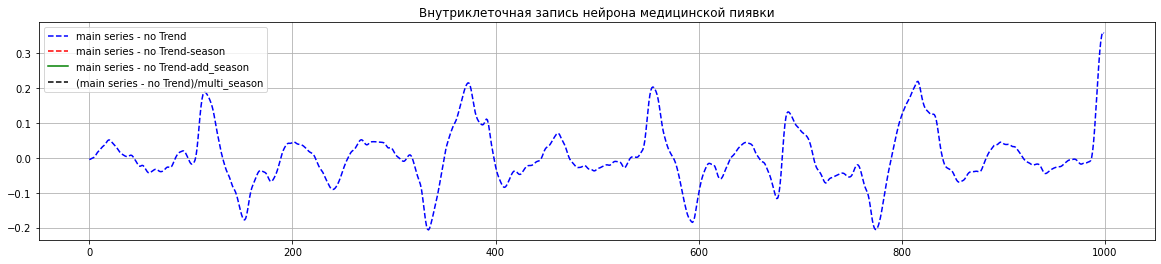

In [23]:
# порисуем
plt.figure(figsize =(20,4))
plt.plot(x[:1000], y_no_trend_no_season[:1000]['no_trend'], '--b' , label ='main series - no Trend')
plt.plot(x[:1000], y_no_trend_no_season[:1000]['no_season'], '--r' , label ='main series - no Trend-season')
plt.plot(x[:1000], y_no_trend_no_season[:1000]['no_season'].rolling(season_f).mean(), 'g' , label ='main series - no Trend-add_season')
plt.plot(x[:1000], y_no_trend_no_season[:1000]['no_season'].rolling(season_fm).mean(), '--k' , label ='(main series - no Trend)/multi_season')

plt.title('Внутриклеточная запись нейрона медицинской пиявки' )
plt.legend()
plt.grid()
plt.show()

In [24]:
len(s_i)

20000

In [25]:
tab_f.loc[np.abs(tab_f['multi_season']-1) < 0.1].head(300)

add  multi_season
1     -3.697817e-15      1.000000
3      6.524854e-07      0.984233
5      1.297473e-06      0.919583
9      2.569644e-06      1.027719
12     3.607683e-06      1.083998
47     8.173717e-06      1.067263
701   -2.670159e-06      0.929004
714   -8.419758e-07      1.037940
1084  -3.108070e-06      1.087874
1189   4.911190e-06      1.055723
1985   5.866158e-06      0.983029
3465   1.253551e-06      1.035051
8053  -4.077855e-06      0.921921
8249   2.680128e-06      0.946358
12758 -1.323986e-05      1.019220
16705  1.681699e-05      0.949779

In [26]:
tab_f.loc[np.abs(tab_f['add']) < 0.2].head(300)

add  multi_season
1   -3.697817e-15      1.000000
2    3.243122e-07      0.879904
3    6.524854e-07      0.984233
4    9.775656e-07      1.116514
5    1.297473e-06      0.919583
..            ...           ...
296 -3.803004e-06    -31.237207
297 -4.093005e-06   -498.138523
298 -4.374773e-06      1.973848
299 -4.651068e-06     19.499118
300 -4.923769e-06     -1.184126

[300 rows x 2 columns]

лучший вариант по мультипликативному сезону: 2167 семплов

In [27]:
y_season = y_no_trend_no_season['no_season'].rolling(season_fm).mean()

In [28]:
y_season[np.where(np.abs(y_season) < np.mean(np.abs(y_season))*0.001)[0]] = np.mean(np.abs(y_season))
y_season

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
199995    0.076274
199996    0.079749
199997    0.082743
199998    0.084702
199999    0.084949
Name: no_season, Length: 200000, dtype: float64

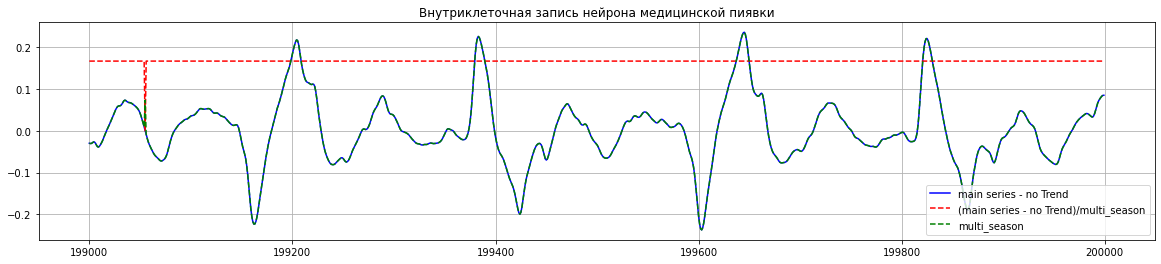

In [29]:
y_no_trend_no_season['season'] = y_season
y_no_trend_no_season['no_trend_no_season'] = y_no_trend_no_season['no_season'] / y_season
y_no_trend_no_season['add_season'] = y_no_trend_no_season['no_trend'].rolling(season).mean()

plt.figure(figsize =(20,4))

plt.plot( x[-1000:],y_no_trend_no_season['no_season'][-1000:], 'b' , label ='main series - no Trend')
plt.plot( x[-1000:],y_no_trend_no_season['no_trend_no_season'][-1000:]/6 , '--r' , label ='(main series - no Trend)/multi_season')
plt.plot( x[-1000:],y_season[-1000:], '--g' , label ='multi_season')

plt.title('Внутриклеточная запись нейрона медицинской пиявки' )
plt.legend()
plt.grid()
plt.show()

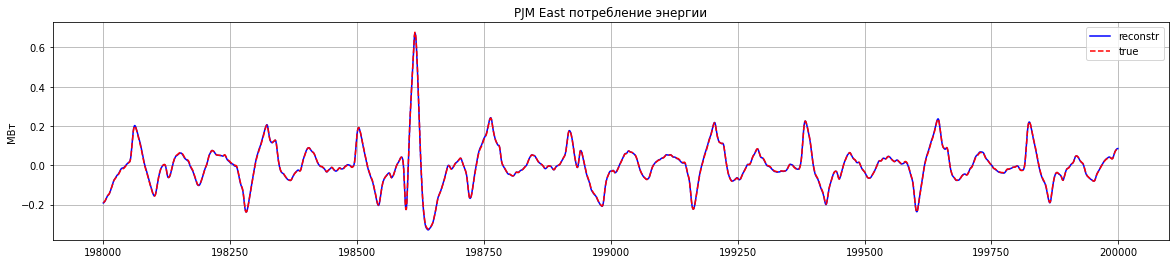

In [30]:
plt.figure(figsize =(20,4))
# 6*y_no_trend_no_season['add_season'][-280:]  - поправка на неаккуратные добавки -сделаные выше (при выделении сезона не учтена)
plt.plot( x[-2000:],y_no_trend_no_season['season'][-2000:] * y_no_trend_no_season['no_trend_no_season'][-2000:] + y_no_trend_no_season['trend'][-2000:] - y_no_trend_no_season['add_season'][-2000:], 'b' , label ='reconstr')
plt.plot( x[-2000:],y[-2000:] , '--r' , label ='true')

plt.title('PJM East потребление энергии' )
plt.legend()
plt.grid()
plt.ylabel ( 'МВт' )
plt.show()

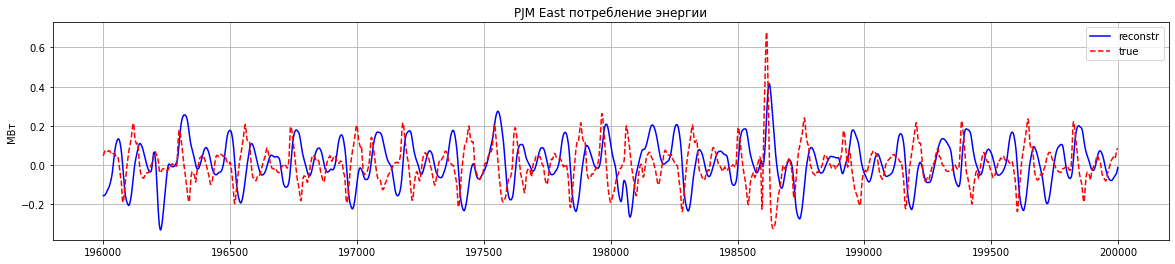

In [56]:
plt.figure(figsize =(20,4))
# 6*y_no_trend_no_season['add_season'][-280:]  - поправка на неаккуратные добавки -сделаные выше (при выделении сезона не учтена)
plt.plot( x[-4000:],y_no_trend_no_season['add_season'][-4000:]*100, 'b' , label ='reconstr')
plt.plot( x[-4000:],y[-4000:] , '--r' , label ='true')

plt.title('PJM East потребление энергии' )
plt.legend()
plt.grid()
plt.ylabel ( 'МВт' )
plt.show()

Чтобы график шумов был соразмерный увеличил их амплитуда в 100 раз.

In [32]:
y_no_trend_no_season['add_season'] = y_no_trend_no_season['add_season']

In [33]:
y_ = y_no_trend_no_season.loc[y_no_trend_no_season['add_season'].notnull(), 'add_season'].values

In [34]:
y_no_trend_no_season.loc[y_no_trend_no_season['add_season'].notnull(), 'add_season'].describe()

count    197834.000000
mean          0.000047
std           0.001128
min          -0.005679
25%          -0.000617
50%           0.000100
75%           0.000781
max           0.005256
Name: add_season, dtype: float64

In [35]:
sf.write('osfstorage/olfact_000.wav', y_, sr, 'PCM_24')

In [36]:
ipd.Audio('osfstorage/olfact_000.wav')

In [37]:
ipd.Audio('osfstorage/olfact_.wav')

In [38]:
ipd.Audio(olfact_data)

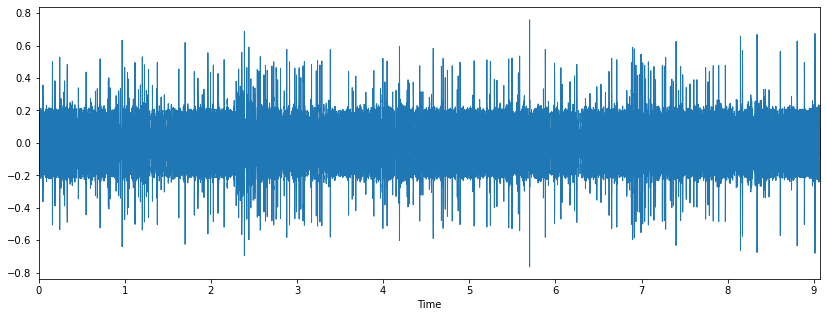

In [39]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

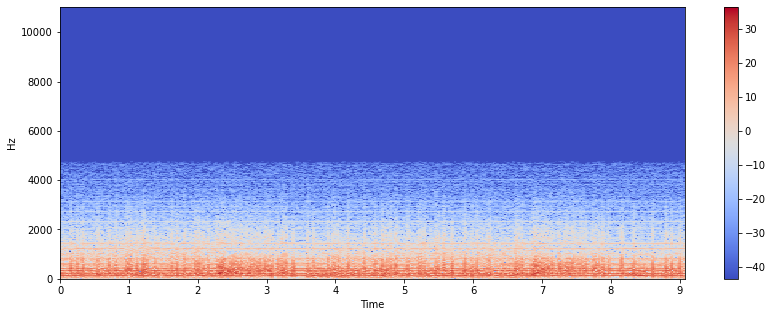

In [40]:
Y = librosa.stft(y)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

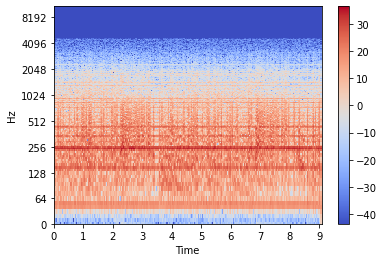

In [41]:
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

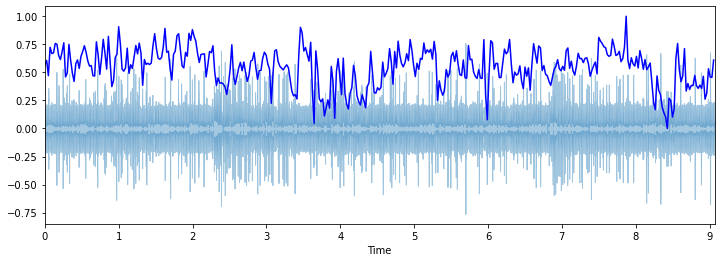

In [42]:
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
spectral_centroids.shape
(775,)
# Вычисление временной переменной для визуализации
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Нормализация спектрального центроида для визуализации
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)
# Построение спектрального центроида вместе с формой волны
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

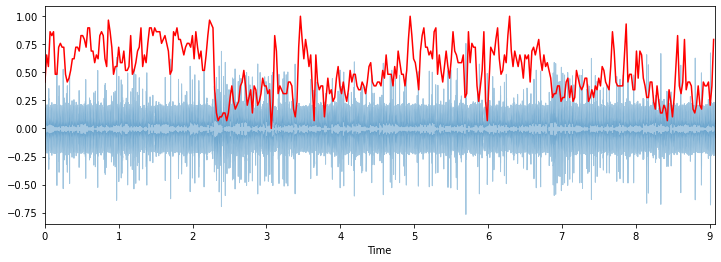

In [43]:
spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

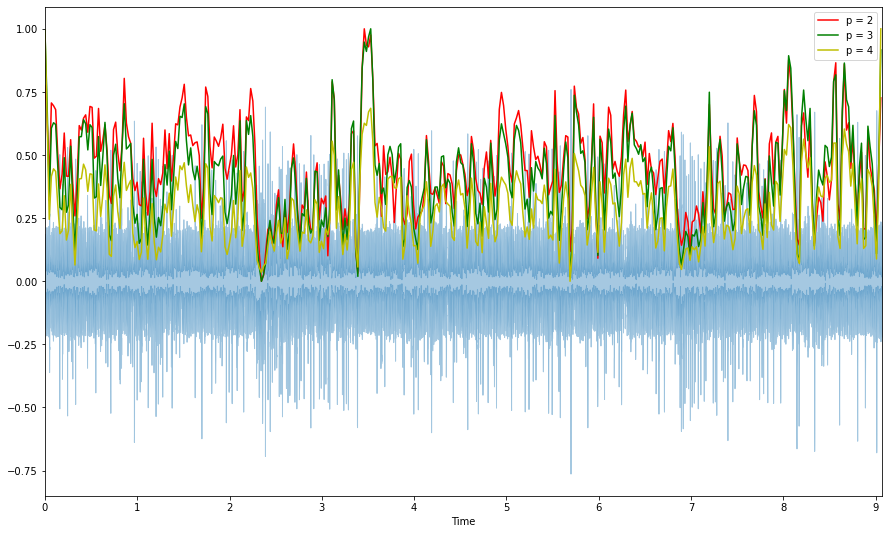

In [44]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

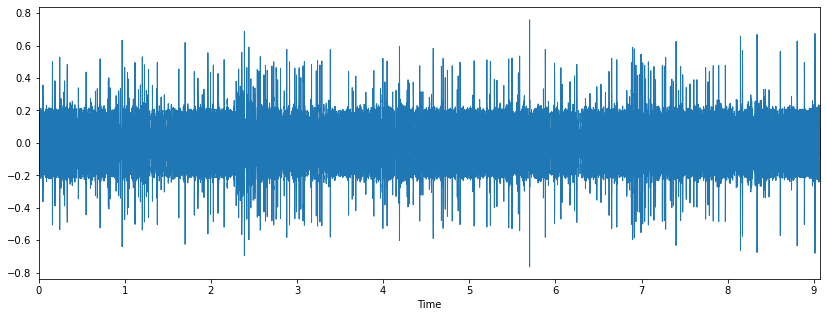

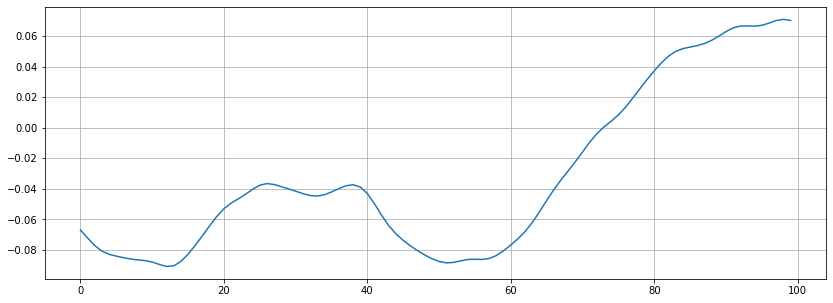

In [45]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(y[n0:n1])
plt.grid()

In [46]:
zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
print(sum(zero_crossings))#16

1


(20, 391)


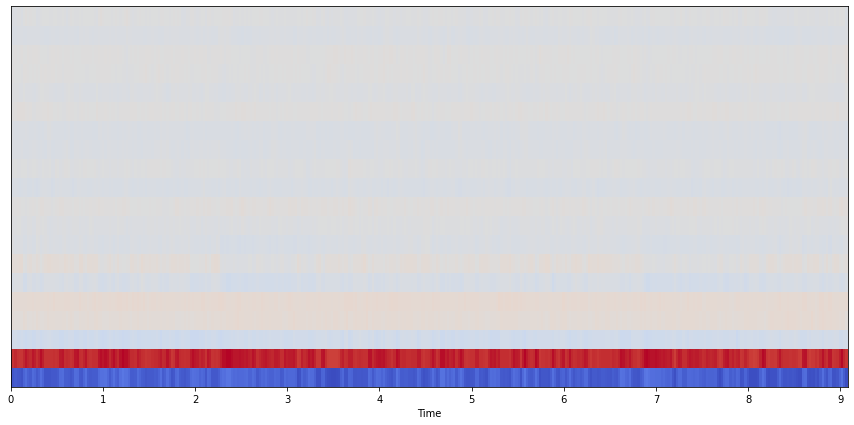

In [47]:
mfccs = librosa.feature.mfcc(y, sr=sr)
print(mfccs.shape)
(20, 97)
# Отображение MFCC:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [48]:
# chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
# plt.figure(figsize=(15, 5))
# librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')